Provat amb varios BatchSizes i diferents Weights Inicializations (Xavier, 0, random, He)

In [1]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils import np_utils
from sklearn.model_selection import ParameterSampler
from keras.initializers import glorot_normal, he_normal, Zeros, RandomNormal
from keras import backend as K
K.clear_session()
from keras.utils import to_categorical


Using TensorFlow backend.
/home/teamupcidl/env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


We process the data imported from MNIST Dataset. We make the dataset separation and reshaping of them. We normalize both dataset partitions and we print the information

In [2]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.
X_test = X_test / 255.
print(X_train.shape)

(60000, 28, 28, 1)


Encode the labels as one-hot vectors

In [3]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

With this function, we create now the model we will use. It has 6 layers: 
**Convulutional:** with 32 5x5 filters and a ReLU activation function
**Max Pooling**: 


Here we have the differents functions we will use:
Two for training the model functions for the two parameters we have to invest and two for plotting the accuracy and the loss:

In [4]:
#Create the model
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128,  activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Creating and training the model with different Batch Sizes
def train_model_batch(model, batchSize):
    print(y_train.shape)
    history = model.fit(X_train, y_train, 
                        validation_data=(X_test, y_test),
                        epochs=10, batch_size=batchSize, verbose=0)
    return history

# Creating and training the model with different Weights Initializations
#  Weights initialization: https://keras.io/initializers/
def train_model_weights(weightsInit):
    if('xavier' in initType['Conv2D']):
        Conv = glorot_normal()
    elif('random' in initType['Conv2D']):
        Conv = RandomNormal()
    elif('zeros' in initType['Conv2D']):
        Conv = Zeros()
    else:
        Conv = he_normal()
    if('xavier' in initType['Dense']):
        Denses = glorot_normal()
    elif('random' in initType['Dense']):
        Denses = RandomNormal()
    elif('zeros' in initType['Dense']):
        Denses = Zeros()
    else:
        Denses = he_normal()
    
    model = Sequential()
    model.add(Conv2D(32, (5, 5),  kernel_initializer=Conv, input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, kernel_initializer=Denses,  activation='relu'))
    model.add(Dense(num_classes, kernel_initializer=Denses, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=batch, verbose=)
    return history

In [5]:
#Plotting the Accuracy
def plot_accuracy(history):    
    plt.plot(history.history['acc'], label='training accuracy')
    plt.plot(history.history['val_acc'], label='validation accuracy')
    plt.legend()
    plt.title("Accuracy")
    plt.show()

#Plotting the loss
def plot_loss(history):   
    plt.plot(history.history['loss'], label='training loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.title('Loss (cat. cross entropy)')
    plt.legend()
    plt.show()

(60000, 10)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 30s 497us/step - loss: 0.1681 - acc: 0.9505 - val_loss: 0.0596 - val_acc: 0.9816
Epoch 2/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.0569 - acc: 0.9823 - val_loss: 0.0392 - val_acc: 0.9869
Epoch 3/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.0397 - acc: 0.9873 - val_loss: 0.0373 - val_acc: 0.9876
Epoch 4/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.0295 - acc: 0.9902 - val_loss: 0.0361 - val_acc: 0.9883
Epoch 5/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.0236 - acc: 0.9922 - val_loss: 0.0390 - val_acc: 0.9871
Epoch 6/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.0196 - acc: 0.9937 - val_loss: 0.0336 - val_acc: 0.9891
Epoch 7/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.0147 - acc: 0.9953 - val_lo

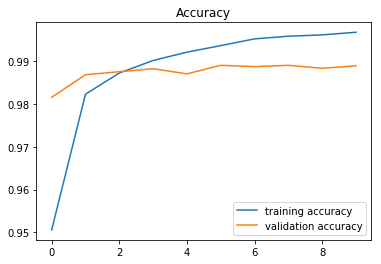

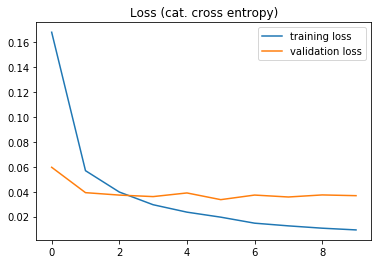

10000/10000 [==============================] - 1s 76us/step

 Validation Error: 1.10%

 Now we tried with a batch size = 64
 LOoss = 0.009311175695087878
 Accuracy = 0.989
 Val_error =1.0999999999999943

 The best parameters are:
 BatchSize = 64
 Accuracy = 0.989
 Loss = 0.009311175695087878
(60000, 10)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0045 - acc: 0.9987 - val_loss: 0.0344 - val_acc: 0.9909
Epoch 2/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.0030 - acc: 0.9991 - val_loss: 0.0367 - val_acc: 0.9911
Epoch 3/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0027 - acc: 0.9992 - val_loss: 0.0365 - val_acc: 0.9910
Epoch 4/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0036 - acc: 0.9989 - val_loss: 0.0474 - val_acc: 0.9881
Epoch 5/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0042 - acc: 0.99

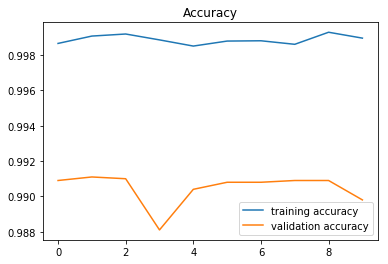

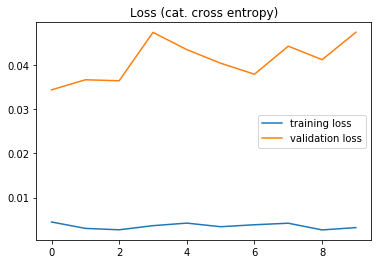

10000/10000 [==============================] - 1s 72us/step

 Validation Error: 1.02%

 Now we tried with a batch size = 128
 LOoss = 0.0031849749430022107
 Accuracy = 0.9898
 Val_error =1.019999999999996

 The best parameters are:
 BatchSize = 128
 Accuracy = 0.9898
 Loss = 0.0031849749430022107
(60000, 10)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.0018 - acc: 0.9995 - val_loss: 0.0402 - val_acc: 0.9910
Epoch 2/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0011 - acc: 0.9997 - val_loss: 0.0416 - val_acc: 0.9914
Epoch 3/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0013 - acc: 0.9996 - val_loss: 0.0423 - val_acc: 0.9907
Epoch 4/10
60000/60000 [==============================] - 3s 54us/step - loss: 6.6745e-04 - acc: 0.9999 - val_loss: 0.0412 - val_acc: 0.9913
Epoch 5/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0015 - 

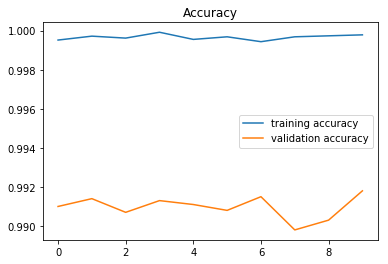

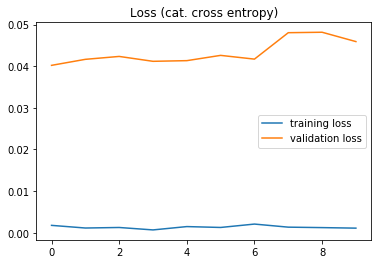

10000/10000 [==============================] - 1s 73us/step

 Validation Error: 0.82%

 Now we tried with a batch size = 256
 LOoss = 0.0010940967700327747
 Accuracy = 0.9918
 Val_error =0.8199999999999932

 The best parameters are:
 BatchSize = 256
 Accuracy = 0.9918
 Loss = 0.0010940967700327747
(60000, 10)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 42us/step - loss: 5.8308e-04 - acc: 0.9999 - val_loss: 0.0419 - val_acc: 0.9916
Epoch 2/10
60000/60000 [==============================] - 2s 41us/step - loss: 4.8279e-04 - acc: 1.0000 - val_loss: 0.0432 - val_acc: 0.9916
Epoch 3/10
60000/60000 [==============================] - 2s 42us/step - loss: 4.3718e-04 - acc: 1.0000 - val_loss: 0.0441 - val_acc: 0.9919
Epoch 4/10
60000/60000 [==============================] - 2s 41us/step - loss: 6.8187e-04 - acc: 0.9999 - val_loss: 0.0441 - val_acc: 0.9918
Epoch 5/10
60000/60000 [==============================] - 2s 41us/step - lo

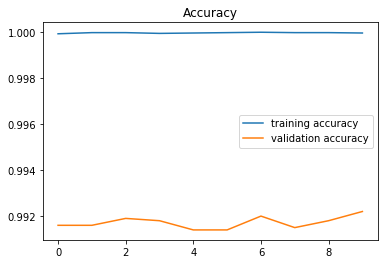

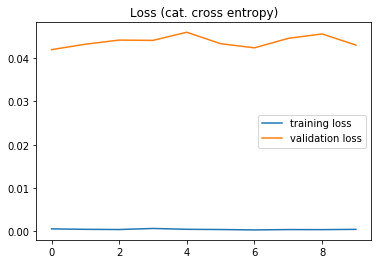

10000/10000 [==============================] - 1s 73us/step

 Validation Error: 0.78%

 Now we tried with a batch size = 512
 LOoss = 0.00047407054177165265
 Accuracy = 0.9921999998092651
 Val_error =0.7800000000000011

 The best parameters are:
 BatchSize = 512
 Accuracy = 0.9921999998092651
 Loss = 0.00047407054177165265
(60000, 10)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 40us/step - loss: 6.8121e-04 - acc: 0.9999 - val_loss: 0.0416 - val_acc: 0.9920
Epoch 2/10
60000/60000 [==============================] - 2s 39us/step - loss: 7.2168e-04 - acc: 0.9998 - val_loss: 0.0411 - val_acc: 0.9925
Epoch 3/10
60000/60000 [==============================] - 2s 39us/step - loss: 6.7446e-04 - acc: 0.9999 - val_loss: 0.0421 - val_acc: 0.9917
Epoch 4/10
60000/60000 [==============================] - 2s 39us/step - loss: 4.4752e-04 - acc: 1.0000 - val_loss: 0.0432 - val_acc: 0.9917
Epoch 5/10
60000/60000 [=========================

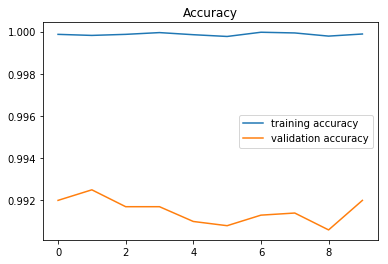

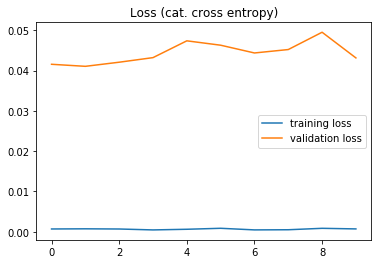

10000/10000 [==============================] - 1s 73us/step

 Validation Error: 0.80%

 Now we tried with a batch size = 600
 LOoss = 0.000696945917670746
 Accuracy = 0.9920000076293946
 Val_error =0.7999999999999972

 The best parameters are:
 BatchSize = 512
 Accuracy = 0.9920000076293946
 Loss = 0.00047407054177165265
(60000, 10)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 36us/step - loss: 4.8631e-04 - acc: 0.9999 - val_loss: 0.0419 - val_acc: 0.9920
Epoch 2/10
60000/60000 [==============================] - 2s 36us/step - loss: 4.0386e-04 - acc: 1.0000 - val_loss: 0.0432 - val_acc: 0.9923
Epoch 3/10
60000/60000 [==============================] - 2s 36us/step - loss: 3.9727e-04 - acc: 1.0000 - val_loss: 0.0450 - val_acc: 0.9918
Epoch 4/10
60000/60000 [==============================] - 2s 36us/step - loss: 4.1342e-04 - acc: 1.0000 - val_loss: 0.0448 - val_acc: 0.9914
Epoch 5/10
60000/60000 [===========================

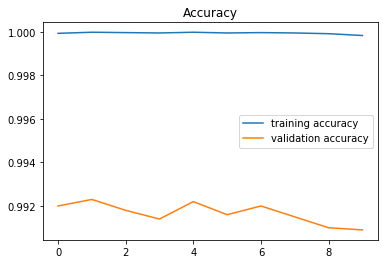

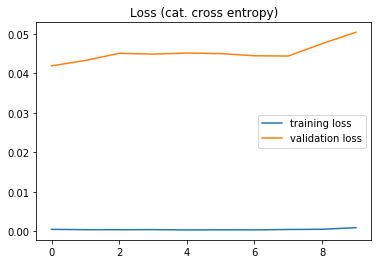

10000/10000 [==============================] - 1s 72us/step

 Validation Error: 0.91%

 Now we tried with a batch size = 1000
 LOoss = 0.0009092191190120502
 Accuracy = 0.9909000039100647
 Val_error =0.9099999999999966

 The best parameters are:
 BatchSize = 512
 Accuracy = 0.9909000039100647
 Loss = 0.00047407054177165265
(60000, 10)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 34us/step - loss: 7.5322e-04 - acc: 0.9999 - val_loss: 0.0458 - val_acc: 0.9915
Epoch 2/10
60000/60000 [==============================] - 2s 33us/step - loss: 3.9326e-04 - acc: 0.9999 - val_loss: 0.0458 - val_acc: 0.9915
Epoch 3/10
60000/60000 [==============================] - 2s 33us/step - loss: 3.3056e-04 - acc: 1.0000 - val_loss: 0.0457 - val_acc: 0.9916
Epoch 4/10
60000/60000 [==============================] - 2s 33us/step - loss: 3.3283e-04 - acc: 1.0000 - val_loss: 0.0460 - val_acc: 0.9914
Epoch 5/10
60000/60000 [=========================

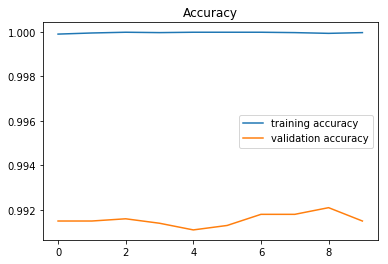

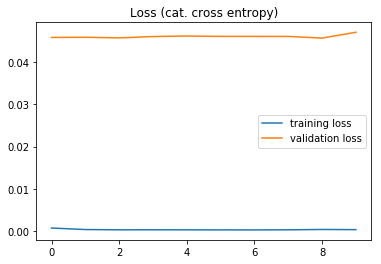

10000/10000 [==============================] - 1s 72us/step

 Validation Error: 0.85%

 Now we tried with a batch size = 2000
 LOoss = 0.00036945312946651634
 Accuracy = 0.9914999961853027
 Val_error =0.8499999999999943

 The best parameters are:
 BatchSize = 512
 Accuracy = 0.9914999961853027
 Loss = 0.00047407054177165265
(60000, 10)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 33us/step - loss: 3.4593e-04 - acc: 1.0000 - val_loss: 0.0459 - val_acc: 0.9919
Epoch 2/10
60000/60000 [==============================] - 2s 32us/step - loss: 3.2192e-04 - acc: 1.0000 - val_loss: 0.0457 - val_acc: 0.9919
Epoch 3/10
60000/60000 [==============================] - 2s 32us/step - loss: 3.0778e-04 - acc: 1.0000 - val_loss: 0.0454 - val_acc: 0.9920
Epoch 4/10
60000/60000 [==============================] - 2s 32us/step - loss: 3.0745e-04 - acc: 1.0000 - val_loss: 0.0453 - val_acc: 0.9923
Epoch 5/10
60000/60000 [========================

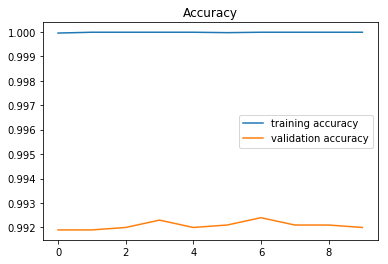

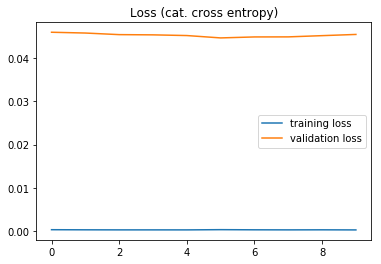

10000/10000 [==============================] - 1s 73us/step

 Validation Error: 0.80%

 Now we tried with a batch size = 3000
 LOoss = 0.00029768562928893515
 Accuracy = 0.9919999957084655
 Val_error =0.7999999999999972

 The best parameters are:
 BatchSize = 512
 Accuracy = 0.9919999957084655
 Loss = 0.00047407054177165265
(60000, 10)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 35us/step - loss: 3.0841e-04 - acc: 1.0000 - val_loss: 0.0455 - val_acc: 0.9920
Epoch 2/10
60000/60000 [==============================] - 2s 30us/step - loss: 3.1213e-04 - acc: 1.0000 - val_loss: 0.0455 - val_acc: 0.9915
Epoch 3/10
60000/60000 [==============================] - 2s 30us/step - loss: 3.2342e-04 - acc: 1.0000 - val_loss: 0.0456 - val_acc: 0.9916
Epoch 4/10
60000/60000 [==============================] - 2s 30us/step - loss: 2.9920e-04 - acc: 1.0000 - val_loss: 0.0457 - val_acc: 0.9915
Epoch 5/10
60000/60000 [========================

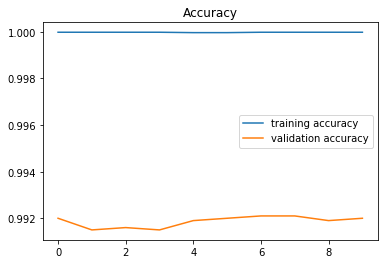

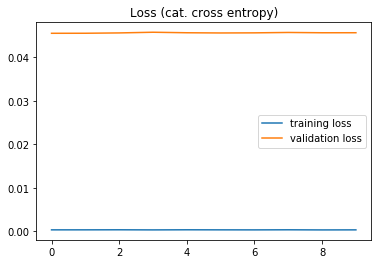

10000/10000 [==============================] - 1s 72us/step

 Validation Error: 0.80%

 Now we tried with a batch size = 6000
 LOoss = 0.00030657596917080807
 Accuracy = 0.9919999837875366
 Val_error =0.7999999999999972

 The best parameters are:
 BatchSize = 512
 Accuracy = 0.9919999837875366
 Loss = 0.00047407054177165265


In [6]:
batchSize = [64, 128, 256, 512, 600, 1000, 2000, 3000, 6000]                   
model = create_model()
acc=0;
batch=0;
val_error=0
loss=0
for size in batchSize:
    history = train_model_batch(model, size)
    acc_temp = history.history['val_acc']
    loss_temp = history.history['loss']
    plot_accuracy(history)
    plot_loss(history)
    scores = model.evaluate(X_test, y_test, verbose=0)
    
    print("\n Validation Error: %.2f%%" % (100-scores[1]*100))
    
    print("\n Now we tried with a batch size = " + str(size) + 
          "\n LOoss = " + str(loss_temp[9]) + 
          "\n Accuracy = " + str(acc_temp[9]) +
          "\n Val_error =" + str(100-scores[1]*100))
    
    if (acc_temp[9] > acc):
        acc = acc_temp[9]
        loss = loss_temp[9]
        val_error = (100-scores[1]*100)
        batch = size
        
    print("\n The best parameters are:" +
          "\n BatchSize = " + str(batch) + 
          "\n Accuracy = " + str(acc_temp[9]) +
          "\n Loss = " + str(loss))

Batch_Size conclusions:
We try a different values to the hyperparameter batch_size --> batchSize = [64, 128, 256, 512, 600, 1000, 2000, 3000, 6000].
We see that all the results are too similars for each batch size value, the accuracy and the loss are practically constants at all epochs both in training and in validation. Also the accuracy of the train a lot of times is 1.0 at the first epoch so we can say that we have more epochs to this train that number of epoch that we need.
Our best parameter in this experiment is using the batch_size hyperparameter of 512 this value give us anaccuracy train 0f 1.0,  loss train of 0.00047 accuracy validation of 0.9921, loss validation of 0.043 and a validation error of 0.78%.


We use the diferent weights to initialize, Conv2D:zerosDenses: zeros
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 44us/step - loss: 2.3020 - acc: 0.1111 - val_loss: 2.3014 - val_acc: 0.1135
Epoch 2/30
60000/60000 [==============================] - 3s 42us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 3/30
60000/60000 [==============================] - 3s 43us/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 4/30
60000/60000 [==============================] - 2s 41us/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 5/30
60000/60000 [==============================] - 2s 41us/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 6/30
60000/60000 [==============================] - 2s 41us/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 7/30
60000/60000 [==============================] - 2

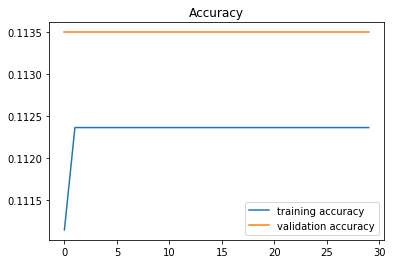

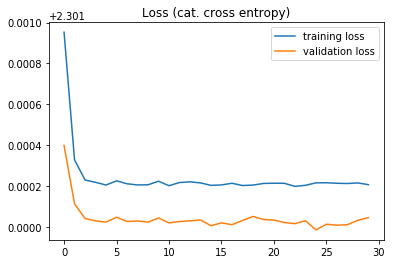

10000/10000 [==============================] - 1s 73us/step
Baseline Error: 0.80%
Conv2D: zerosDenses: zeros

 The best parameters are:
 Accuracy = 0.11350000001192093
 Loss = 2.3012236181894936
We use the diferent weights to initialize, Conv2D:zerosDenses: xavier
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 44us/step - loss: 2.3020 - acc: 0.1108 - val_loss: 2.3014 - val_acc: 0.1135
Epoch 2/30
60000/60000 [==============================] - 2s 41us/step - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 3/30
60000/60000 [==============================] - 2s 41us/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 4/30
60000/60000 [==============================] - 2s 41us/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 5/30
60000/60000 [==============================] - 2s 41us/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135


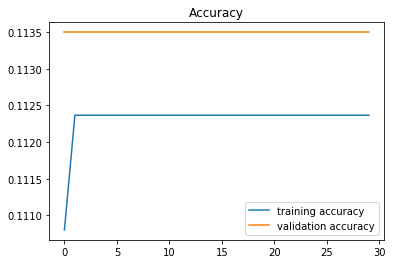

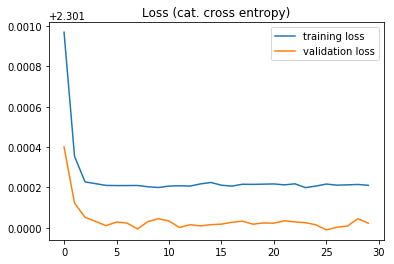

10000/10000 [==============================] - 1s 72us/step
Baseline Error: 0.80%

 The best parameters are:
 Accuracy = 0.11350000001192093
 Loss = 2.3012236181894936
We use the diferent weights to initialize, Conv2D:zerosDenses: random
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 45us/step - loss: 2.3019 - acc: 0.1117 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 2/30
60000/60000 [==============================] - 2s 41us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 3/30
60000/60000 [==============================] - 2s 41us/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 4/30
60000/60000 [==============================] - 2s 41us/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 5/30
60000/60000 [==============================] - 2s 41us/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 6/30
60000/60000 [===

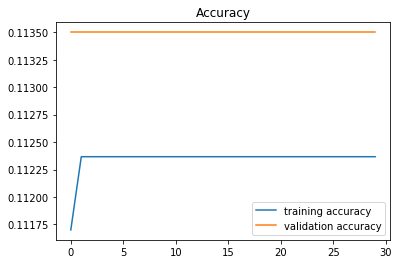

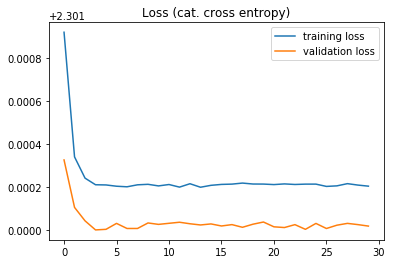

10000/10000 [==============================] - 1s 73us/step
Baseline Error: 0.80%

 The best parameters are:
 Accuracy = 0.11350000001192093
 Loss = 2.3012236181894936
We use the diferent weights to initialize, Conv2D:zerosDenses: he_normal
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 45us/step - loss: 2.3019 - acc: 0.1115 - val_loss: 2.3014 - val_acc: 0.1135
Epoch 2/30
60000/60000 [==============================] - 2s 41us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 3/30
60000/60000 [==============================] - 2s 41us/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 4/30
60000/60000 [==============================] - 2s 41us/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 5/30
60000/60000 [==============================] - 2s 41us/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 6/30
60000/60000 [

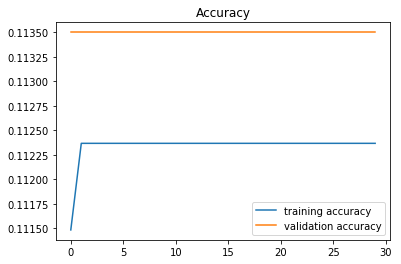

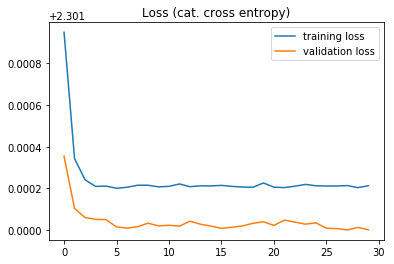

10000/10000 [==============================] - 1s 75us/step
Baseline Error: 0.80%

 The best parameters are:
 Accuracy = 0.11350000001192093
 Loss = 2.3012236181894936
We use the diferent weights to initialize, Conv2D:xavierDenses: zeros
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 47us/step - loss: 2.3019 - acc: 0.1110 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 2/30
60000/60000 [==============================] - 3s 44us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 3/30
60000/60000 [==============================] - 3s 42us/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 4/30
60000/60000 [==============================] - 2s 42us/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 5/30
60000/60000 [==============================] - 3s 42us/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 6/30
60000/60000 [===

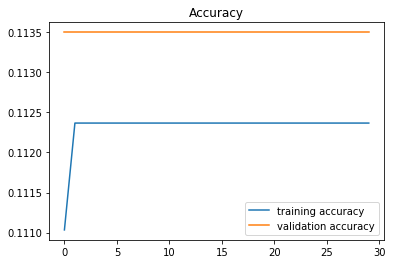

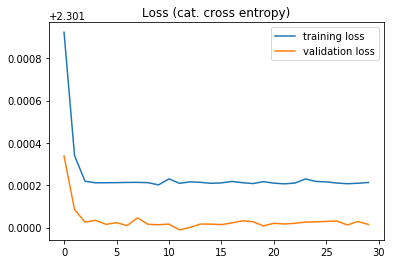

10000/10000 [==============================] - 1s 74us/step
Baseline Error: 0.80%

 The best parameters are:
 Accuracy = 0.11350000001192093
 Loss = 2.3012236181894936
We use the diferent weights to initialize, Conv2D:xavierDenses: xavier
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 47us/step - loss: 0.4023 - acc: 0.8899 - val_loss: 0.1292 - val_acc: 0.9645
Epoch 2/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.1098 - acc: 0.9681 - val_loss: 0.0689 - val_acc: 0.9791
Epoch 3/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0737 - acc: 0.9787 - val_loss: 0.0519 - val_acc: 0.9828
Epoch 4/30
60000/60000 [==============================] - 2s 42us/step - loss: 0.0577 - acc: 0.9831 - val_loss: 0.0443 - val_acc: 0.9843
Epoch 5/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0486 - acc: 0.9853 - val_loss: 0.0386 - val_acc: 0.9874
Epoch 6/30
60000/60000 [==

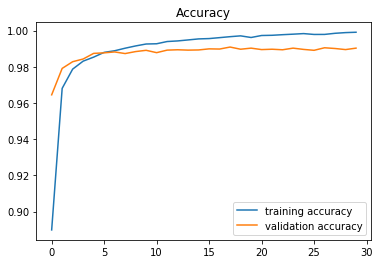

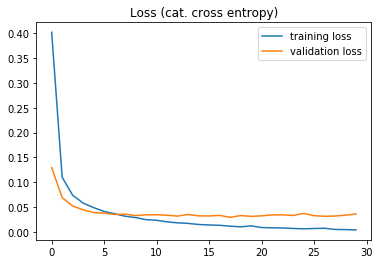

10000/10000 [==============================] - 1s 74us/step
Baseline Error: 0.80%
Conv2D: xavierDenses: xavier

 The best parameters are:
 Accuracy = 0.9890999996185302
 Loss = 0.024345019531746705
We use the diferent weights to initialize, Conv2D:xavierDenses: random
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 48us/step - loss: 0.5022 - acc: 0.8594 - val_loss: 0.1877 - val_acc: 0.9448
Epoch 2/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.1563 - acc: 0.9550 - val_loss: 0.0991 - val_acc: 0.9726
Epoch 3/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0998 - acc: 0.9709 - val_loss: 0.0750 - val_acc: 0.9765
Epoch 4/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0759 - acc: 0.9773 - val_loss: 0.0602 - val_acc: 0.9800
Epoch 5/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0612 - acc: 0.9819 - val_loss: 0.0474 - val_acc: 0.9

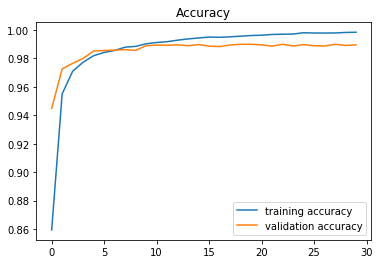

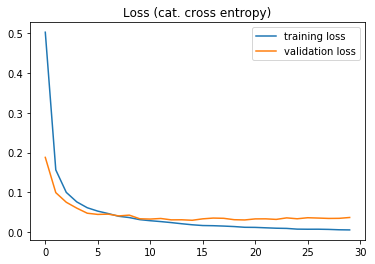

10000/10000 [==============================] - 1s 76us/step
Baseline Error: 0.80%

 The best parameters are:
 Accuracy = 0.9888999996185303
 Loss = 0.024345019531746705
We use the diferent weights to initialize, Conv2D:xavierDenses: he_normal
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 48us/step - loss: 0.3882 - acc: 0.8927 - val_loss: 0.1320 - val_acc: 0.9618
Epoch 2/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.1127 - acc: 0.9676 - val_loss: 0.0764 - val_acc: 0.9768
Epoch 3/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0746 - acc: 0.9782 - val_loss: 0.0572 - val_acc: 0.9812
Epoch 4/30
60000/60000 [==============================] - 2s 42us/step - loss: 0.0590 - acc: 0.9823 - val_loss: 0.0520 - val_acc: 0.9822
Epoch 5/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0477 - acc: 0.9857 - val_loss: 0.0421 - val_acc: 0.9859
Epoch 6/30
60000/60000

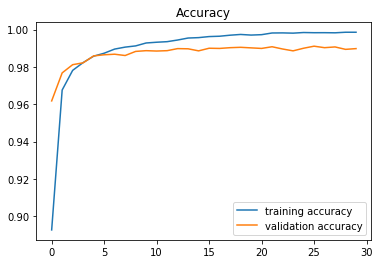

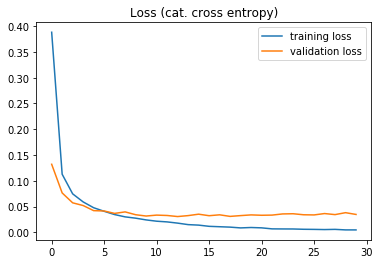

10000/10000 [==============================] - 1s 73us/step
Baseline Error: 0.80%

 The best parameters are:
 Accuracy = 0.9886999995231628
 Loss = 0.024345019531746705
We use the diferent weights to initialize, Conv2D:randomDenses: zeros
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 48us/step - loss: 2.3019 - acc: 0.1119 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 2/30
60000/60000 [==============================] - 3s 42us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 3/30
60000/60000 [==============================] - 3s 42us/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 4/30
60000/60000 [==============================] - 3s 42us/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 5/30
60000/60000 [==============================] - 2s 42us/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 6/30
60000/60000 [==

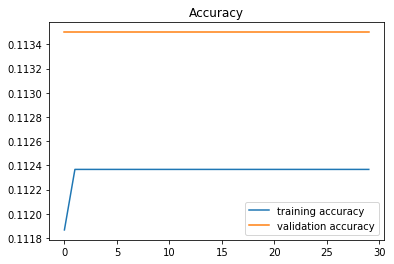

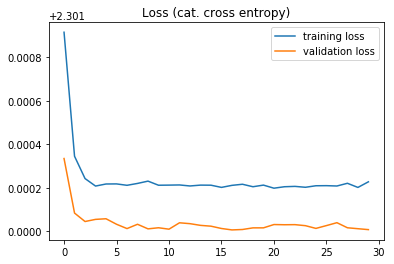

10000/10000 [==============================] - 1s 77us/step
Baseline Error: 0.80%

 The best parameters are:
 Accuracy = 0.11350000001192093
 Loss = 0.024345019531746705
We use the diferent weights to initialize, Conv2D:randomDenses: xavier
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 49us/step - loss: 0.3953 - acc: 0.8921 - val_loss: 0.1446 - val_acc: 0.9567
Epoch 2/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.1196 - acc: 0.9655 - val_loss: 0.0749 - val_acc: 0.9774
Epoch 3/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0767 - acc: 0.9773 - val_loss: 0.0595 - val_acc: 0.9818
Epoch 4/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0606 - acc: 0.9813 - val_loss: 0.0506 - val_acc: 0.9834
Epoch 5/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0485 - acc: 0.9852 - val_loss: 0.0408 - val_acc: 0.9861
Epoch 6/30
60000/60000 [

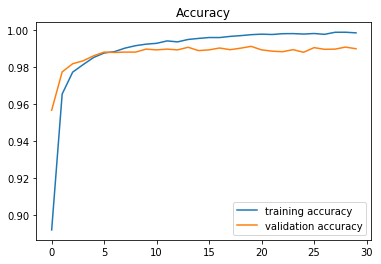

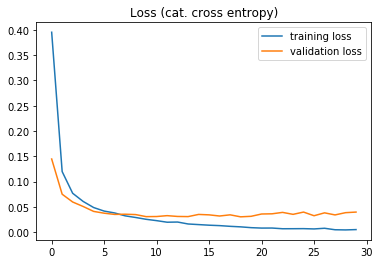

10000/10000 [==============================] - 1s 78us/step
Baseline Error: 0.80%
Conv2D: randomDenses: xavier

 The best parameters are:
 Accuracy = 0.9896999997138977
 Loss = 0.025248174166679384
We use the diferent weights to initialize, Conv2D:randomDenses: random
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 49us/step - loss: 0.4969 - acc: 0.8674 - val_loss: 0.1579 - val_acc: 0.9567
Epoch 2/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.1296 - acc: 0.9632 - val_loss: 0.0858 - val_acc: 0.9761
Epoch 3/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0835 - acc: 0.9759 - val_loss: 0.0604 - val_acc: 0.9822
Epoch 4/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0655 - acc: 0.9807 - val_loss: 0.0565 - val_acc: 0.9821
Epoch 5/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0541 - acc: 0.9845 - val_loss: 0.0459 - val_acc: 0.9

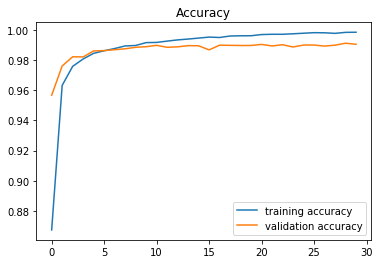

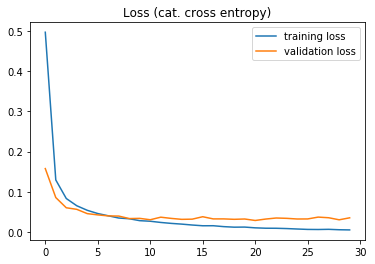

10000/10000 [==============================] - 1s 75us/step
Baseline Error: 0.80%

 The best parameters are:
 Accuracy = 0.9888999997138977
 Loss = 0.025248174166679384
We use the diferent weights to initialize, Conv2D:randomDenses: he_normal
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 50us/step - loss: 0.3891 - acc: 0.8910 - val_loss: 0.1355 - val_acc: 0.9601
Epoch 2/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.1127 - acc: 0.9678 - val_loss: 0.0758 - val_acc: 0.9773
Epoch 3/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0762 - acc: 0.9776 - val_loss: 0.0562 - val_acc: 0.9822
Epoch 4/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0580 - acc: 0.9824 - val_loss: 0.0514 - val_acc: 0.9836
Epoch 5/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0491 - acc: 0.9852 - val_loss: 0.0481 - val_acc: 0.9840
Epoch 6/30
60000/60000

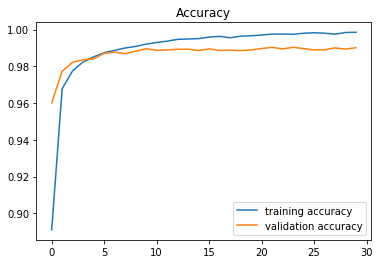

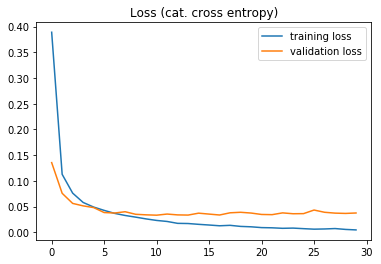

10000/10000 [==============================] - 1s 75us/step
Baseline Error: 0.80%

 The best parameters are:
 Accuracy = 0.9895999997138977
 Loss = 0.025248174166679384
We use the diferent weights to initialize, Conv2D:he_normalDenses: zeros
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 50us/step - loss: 2.3019 - acc: 0.1108 - val_loss: 2.3014 - val_acc: 0.1135
Epoch 2/30
60000/60000 [==============================] - 3s 42us/step - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 3/30
60000/60000 [==============================] - 3s 42us/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 4/30
60000/60000 [==============================] - 3s 42us/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 5/30
60000/60000 [==============================] - 3s 42us/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 6/30
60000/60000 

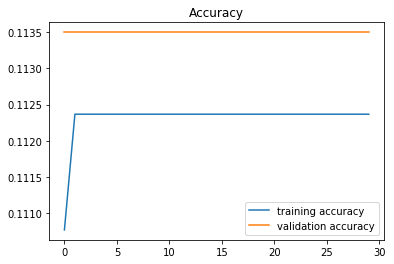

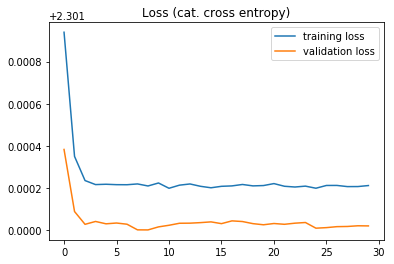

10000/10000 [==============================] - 1s 77us/step
Baseline Error: 0.80%

 The best parameters are:
 Accuracy = 0.11350000001192093
 Loss = 0.025248174166679384
We use the diferent weights to initialize, Conv2D:he_normalDenses: xavier
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 50us/step - loss: 0.2836 - acc: 0.9136 - val_loss: 0.1002 - val_acc: 0.9715
Epoch 2/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0893 - acc: 0.9738 - val_loss: 0.0668 - val_acc: 0.9786
Epoch 3/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0608 - acc: 0.9818 - val_loss: 0.0474 - val_acc: 0.9846
Epoch 4/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0458 - acc: 0.9862 - val_loss: 0.0411 - val_acc: 0.9867
Epoch 5/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0369 - acc: 0.9886 - val_loss: 0.0381 - val_acc: 0.9872
Epoch 6/30
60000/6000

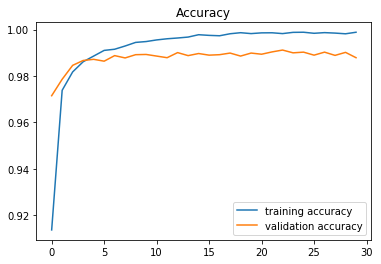

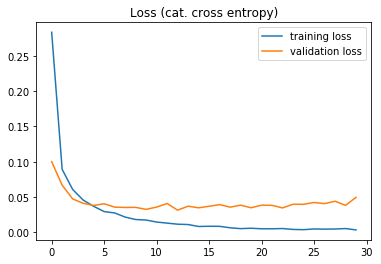

10000/10000 [==============================] - 1s 79us/step
Baseline Error: 0.80%

 The best parameters are:
 Accuracy = 0.9892999997138977
 Loss = 0.025248174166679384
We use the diferent weights to initialize, Conv2D:he_normalDenses: random
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 52us/step - loss: 0.3711 - acc: 0.8894 - val_loss: 0.1164 - val_acc: 0.9677
Epoch 2/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.1001 - acc: 0.9708 - val_loss: 0.0682 - val_acc: 0.9799
Epoch 3/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0661 - acc: 0.9805 - val_loss: 0.0491 - val_acc: 0.9848
Epoch 4/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0474 - acc: 0.9858 - val_loss: 0.0451 - val_acc: 0.9861
Epoch 5/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0388 - acc: 0.9884 - val_loss: 0.0446 - val_acc: 0.9855
Epoch 6/30
60000/60000

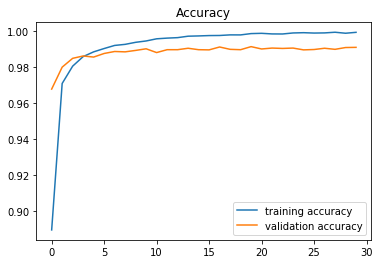

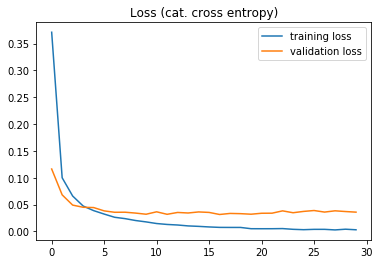

10000/10000 [==============================] - 1s 77us/step
Baseline Error: 0.80%
Conv2D: he_normalDenses: random

 The best parameters are:
 Accuracy = 0.9900999997138977
 Loss = 0.01783749522368113
We use the diferent weights to initialize, Conv2D:he_normalDenses: he_normal
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 52us/step - loss: 0.2729 - acc: 0.9184 - val_loss: 0.0903 - val_acc: 0.9734
Epoch 2/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0794 - acc: 0.9768 - val_loss: 0.0550 - val_acc: 0.9821
Epoch 3/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0554 - acc: 0.9835 - val_loss: 0.0448 - val_acc: 0.9845
Epoch 4/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0421 - acc: 0.9875 - val_loss: 0.0427 - val_acc: 0.9872
Epoch 5/30
60000/60000 [==============================] - 3s 42us/step - loss: 0.0331 - acc: 0.9900 - val_loss: 0.0347 - val_

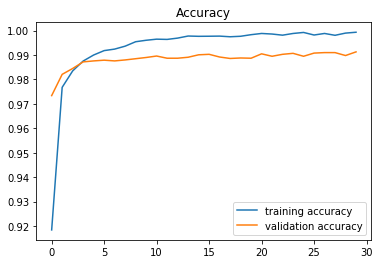

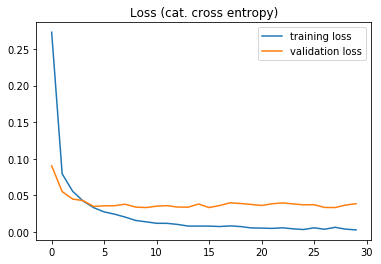

10000/10000 [==============================] - 1s 77us/step
Baseline Error: 0.80%

 The best parameters are:
 Accuracy = 0.9889999996185302
 Loss = 0.01783749522368113


In [7]:
weightsInit = {
    'Conv2D': ['zeros','xavier', 'random', 'he_normal'],
    'Dense': ['zeros','xavier', 'random', 'he_normal']
}
WInits = list(ParameterSampler(weightsInit, n_iter = 16 ))
for initType in WInits:
    print ("We use the diferent weights to initialize, Conv2D:" + initType['Conv2D'] + "Denses: " + initType['Dense'])
    history = train_model_weights(initType)
    plot_accuracy(history)
    plot_loss(history)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Baseline Error: %.2f%%" % (100-scores[1]*100))
    


We select the better batch size to try the different weights initializations. To this initializations we try several functions to initializaize the weights: Xavier, Zeros, Random and He. We use all the combinations with these initializations for conv and dense layers.
We used 30 epochs because we see that with 10 the accuracy didn't take the maximum value and still increasing.
We obtain diferents initializations as better, in train the better weight initialization was Xavier for the Conv and Denses layers, with an accuracy of 0.9991. But the better weight initialization in validation was Random for both type of layers with an accuracy of 0.9905.
We can see also that all the initializations give us a good results except when some of the layers is initialized with Zeros that give us accuracy values of  arround 0.113.